# Disaster prediction from sentences.

This jupyter notebook shows different models I used/trained on to predict disaster from tweeks.
I have also tuned the parameters of the models the best way I could.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# Importing the dataset
train_dataset = pd.read_csv('train.csv')



In [2]:
valid_size = 0.05
#divide in train and test set
from sklearn.model_selection import train_test_split
dataset_train, dataset_valid = train_test_split(train_dataset, test_size = valid_size, random_state = 0)

In [3]:
#preporcessing
training_sentences = []
training_labels = []

training_sentences = dataset_train['text'].tolist()
training_labels = np.array(dataset_train['target'].to_numpy())

print(training_labels)

validate_sentences = []
validate_labels = []

validate_sentences = dataset_valid['text'].tolist()
validate_labels = np.array(dataset_valid['target'].to_numpy())

[0 0 0 ... 1 0 0]


In [4]:
#tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 150
trunc_type='post'
oov_tok = "<OOV>"
num_epochs = 5

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

validate_sequence= tokenizer.texts_to_sequences(validate_sentences)
validate_padded=pad_sequences(validate_sequence,maxlen=max_length, truncating=trunc_type)

In [5]:
#function to pot graphs when needed.
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


In [6]:
#model1 that uses unidirectional GRU
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
gru (GRU)                    (None, 32)                4800      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 165,005
Trainable params: 165,005
Non-trainable params: 0
_________________________________________________________________


In [7]:

history1 = model1.fit(padded, training_labels,validation_data=(validate_padded, validate_labels), epochs=num_epochs)

Train on 7232 samples, validate on 381 samples
Epoch 1/5
7232/7232 [==============================] - 17s 2ms/sample - loss: 0.6301 - accuracy: 0.6421 - val_loss: 0.5357 - val_accuracy: 0.7664
Epoch 2/5
7232/7232 [==============================] - 13s 2ms/sample - loss: 0.3902 - accuracy: 0.8353 - val_loss: 0.4702 - val_accuracy: 0.8084
Epoch 3/5
7232/7232 [==============================] - 13s 2ms/sample - loss: 0.2794 - accuracy: 0.8901 - val_loss: 0.4825 - val_accuracy: 0.8031
Epoch 4/5
7232/7232 [==============================] - 14s 2ms/sample - loss: 0.2179 - accuracy: 0.9195 - val_loss: 0.5254 - val_accuracy: 0.8084
Epoch 5/5
7232/7232 [==============================] - 13s 2ms/sample - loss: 0.1709 - accuracy: 0.9378 - val_loss: 0.6796 - val_accuracy: 0.7612


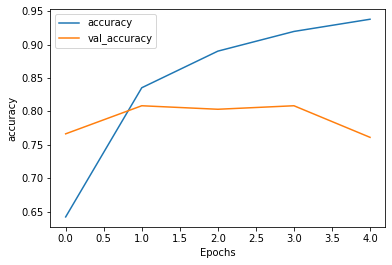

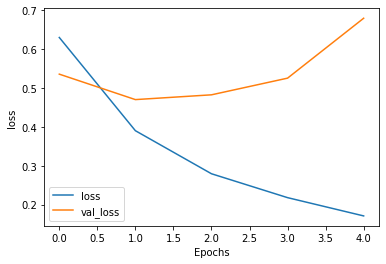

In [8]:
plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

In [9]:
#model1 that uses Convo1D
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________


In [10]:

history2 = model2.fit(padded, training_labels,validation_data=(validate_padded, validate_labels), epochs=num_epochs)

Train on 7232 samples, validate on 381 samples
Epoch 1/5
7232/7232 [==============================] - 5s 661us/sample - loss: 0.5988 - accuracy: 0.6882 - val_loss: 0.4706 - val_accuracy: 0.7953
Epoch 2/5
7232/7232 [==============================] - 4s 521us/sample - loss: 0.3699 - accuracy: 0.8458 - val_loss: 0.4483 - val_accuracy: 0.8163
Epoch 3/5
7232/7232 [==============================] - 4s 553us/sample - loss: 0.2520 - accuracy: 0.9004 - val_loss: 0.4930 - val_accuracy: 0.8005
Epoch 4/5
7232/7232 [==============================] - 4s 534us/sample - loss: 0.1809 - accuracy: 0.9336 - val_loss: 0.5405 - val_accuracy: 0.8031
Epoch 5/5
7232/7232 [==============================] - 4s 491us/sample - loss: 0.1249 - accuracy: 0.9556 - val_loss: 0.6314 - val_accuracy: 0.7874


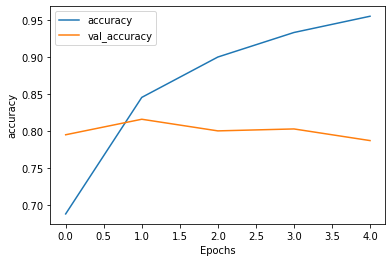

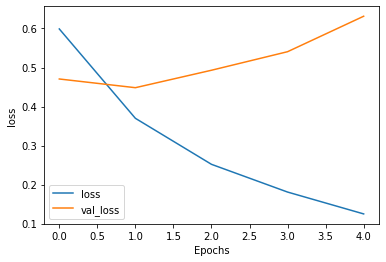

In [11]:
plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

In [12]:
#model1 that uses unidirectional LSTM
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_4 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 167,089
Trainable params: 167,089
Non-trainable params: 0
_________________________________________________________________


In [13]:
history3 = model3.fit(padded, training_labels,validation_data=(validate_padded, validate_labels), epochs=num_epochs)

Train on 7232 samples, validate on 381 samples
Epoch 1/5
7232/7232 [==============================] - 16s 2ms/sample - loss: 0.5905 - accuracy: 0.6757 - val_loss: 0.4515 - val_accuracy: 0.8031
Epoch 2/5
7232/7232 [==============================] - 11s 2ms/sample - loss: 0.3559 - accuracy: 0.8526 - val_loss: 0.4639 - val_accuracy: 0.8084
Epoch 3/5
7232/7232 [==============================] - 11s 2ms/sample - loss: 0.2605 - accuracy: 0.9013 - val_loss: 0.4803 - val_accuracy: 0.8163
Epoch 4/5
7232/7232 [==============================] - 12s 2ms/sample - loss: 0.2002 - accuracy: 0.9273 - val_loss: 0.5360 - val_accuracy: 0.7900
Epoch 5/5
7232/7232 [==============================] - 12s 2ms/sample - loss: 0.1550 - accuracy: 0.9465 - val_loss: 0.5981 - val_accuracy: 0.7953


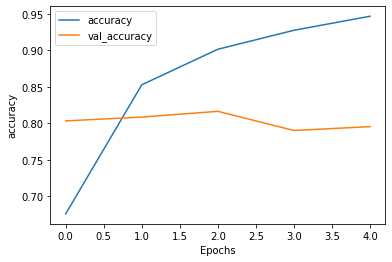

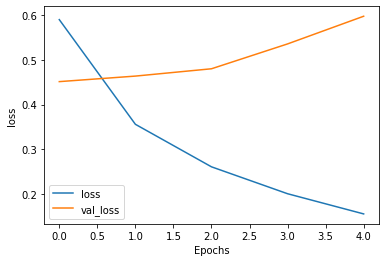

In [14]:
plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')

In [15]:
#model1 that uses bidirectional GRU
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model4.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [16]:
history4 = model4.fit(padded, training_labels,validation_data=(validate_padded, validate_labels), epochs=num_epochs)

Train on 7232 samples, validate on 381 samples
Epoch 1/5
7232/7232 [==============================] - 21s 3ms/sample - loss: 0.6103 - accuracy: 0.6539 - val_loss: 0.5008 - val_accuracy: 0.7638
Epoch 2/5
7232/7232 [==============================] - 14s 2ms/sample - loss: 0.3724 - accuracy: 0.8440 - val_loss: 0.4659 - val_accuracy: 0.8058
Epoch 3/5
7232/7232 [==============================] - 14s 2ms/sample - loss: 0.2667 - accuracy: 0.8957 - val_loss: 0.5100 - val_accuracy: 0.8031
Epoch 4/5
7232/7232 [==============================] - 11s 2ms/sample - loss: 0.2021 - accuracy: 0.9233 - val_loss: 0.5205 - val_accuracy: 0.7953
Epoch 5/5
7232/7232 [==============================] - 12s 2ms/sample - loss: 0.1557 - accuracy: 0.9421 - val_loss: 0.6338 - val_accuracy: 0.8110


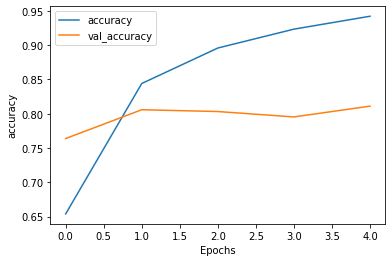

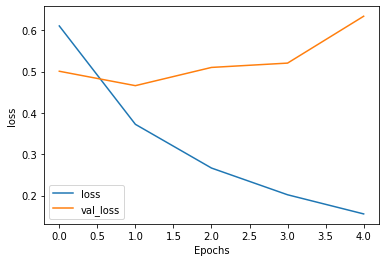

In [17]:
plot_graphs(history4, 'accuracy')
plot_graphs(history4, 'loss')

In [18]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model5.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [19]:
history5 = model5.fit(padded, training_labels,validation_data=(validate_padded, validate_labels), epochs=num_epochs)


Train on 7232 samples, validate on 381 samples
Epoch 1/5
7232/7232 [==============================] - 16s 2ms/sample - loss: 0.5741 - accuracy: 0.6933 - val_loss: 0.4634 - val_accuracy: 0.8005
Epoch 2/5
7232/7232 [==============================] - 12s 2ms/sample - loss: 0.3619 - accuracy: 0.8480 - val_loss: 0.4527 - val_accuracy: 0.8163
Epoch 3/5
7232/7232 [==============================] - 14s 2ms/sample - loss: 0.2659 - accuracy: 0.8934 - val_loss: 0.4751 - val_accuracy: 0.8163
Epoch 4/5
7232/7232 [==============================] - 12s 2ms/sample - loss: 0.1982 - accuracy: 0.9274 - val_loss: 0.5250 - val_accuracy: 0.8031
Epoch 5/5
7232/7232 [==============================] - 10s 1ms/sample - loss: 0.1598 - accuracy: 0.9436 - val_loss: 0.5832 - val_accuracy: 0.7979


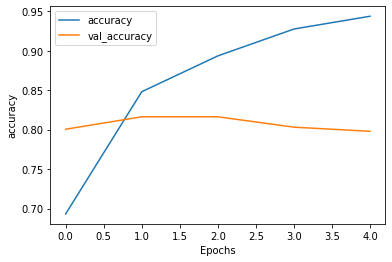

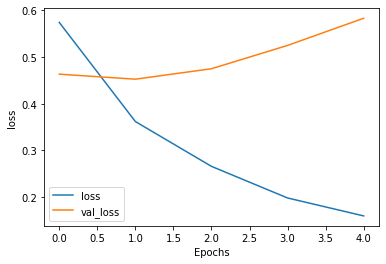

In [20]:
plot_graphs(history5, 'accuracy')
plot_graphs(history5, 'loss')